In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv('Poll_Info.csv', sep='\t')
df2 = pd.read_csv('Poll_Report.csv', sep=';')

In [6]:
# sticth (merge) the two csv-files together
df_stitch = pd.merge(df1, df2, left_on='Question', right_on='Question ID')
df_stitch.drop('Question ID', axis=1, inplace = True)

# Getting the data 
df_stitch['date_time_launched']=pd.to_datetime(df_stitch['Time Launched']).dt.time
df_stitch['date_submitted_time']=pd.to_datetime(df_stitch['Submitted Date/Time']).dt.time
df_stitch.drop(['Time Launched','Submitted Date/Time'],axis=1,inplace=True)

df_stitch['seconds_for_answering']= (pd.to_timedelta(df_stitch['date_submitted_time'].astype(str)) - 
                             pd.to_timedelta(df_stitch['date_time_launched'].astype(str))).dt.total_seconds()

df_stitch.drop(['date_time_launched','date_submitted_time'],axis=1,inplace=True)

df_stitch['answer_is_true'] = np.where(df_stitch['Correct Answer']==df_stitch['Student Answer'],1,0)
df_stitch['answer_is_true'] = df_stitch['answer_is_true'].astype('object')

df_stitch.rename(columns={'User Name':'s_numb'}, inplace=True)
merge_df = df_stitch.groupby(['s_numb','User Email']).agg({'answer_is_true':'sum'}).sort_values(by='answer_is_true', ascending=True)

#df_stitch[df_stitch['s_numb'] == 'Student16']
#df_stitch[df_stitch['s_numb'] == 'Student23']

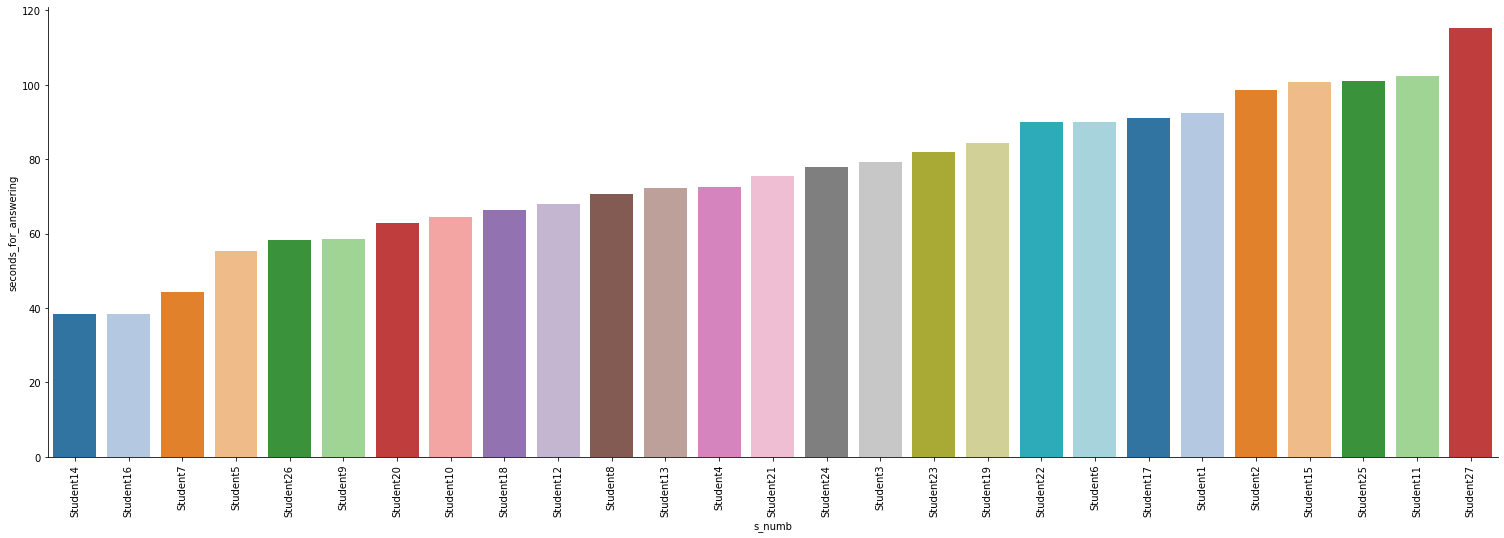

In [9]:
plot_order = df_stitch.groupby('s_numb')['seconds_for_answering'].mean().sort_values(ascending=True).index.values

sns.catplot(data=df_stitch, x='s_numb',  y='seconds_for_answering',kind='bar',ci=None,
            order=plot_order,height=7,aspect=3,palette="tab20");
plt.xticks(rotation=90)
plt.show()

In [1]:
# sorting out all correct answers
answer_sig = []
answer_num = []

for key, value in info_dict.items():
    for i in range(len(s)):
        a, b = s[i]
        if a != key and b != value: 
            answer_sig.append(b)
            answer_num.append(a)

wrong_answers = tuple(zip(answer_num, answer_sig))

NameError: name 'info_dict' is not defined

In [ ]:
answer_sig = []
answer_num = []

for i in range(len(s)):
    for key, value in info_dict.items():
        a, b = s[i]
        if a != key and b != value: 
            answer_sig.append(b)
            answer_num.append(a)
            
wrong_answers = tuple(zip(answer_num, answer_sig))

In [ ]:
ans_c = 0
inum = []
ll = ['A','B','C','D', 'E']
for i in range(len(wrong_answers)):
    a,b = wrong_answers[i]
    for j in range(len(quest)):
        for k in range(len(ll)):
            if a == quest[j] and b == ll[k]:
                ans_c += 1
        inum.append(ans_c)
        ans_c = 0
#print(inum)          

In [ ]:
ans_c = 0
inum = []
xx = {}
for j in range(len(quest)):
    for i in range(len(wrong_answers)):
        a,b = wrong_answers[i]
        if a == quest[j]:
            inum.append(b)
    xx = count_pair(inum)
print(xx)

def count_pair(lis):
    from collections import Counter
    count_dict = {i:lis.count(i) for i in lis}
    return count_dict
            

In [21]:
li = ['Student1Student10', 'Student1Student11', 
 'Student1Student14', 'Student1Student15', 
 'Student1Student18', 'Student1Student19', 
 'Student1Student2', 'Student1Student22', 
 'Student1Student23', 'Student1Student25', 
 'Student1Student26', 'Student1Student27', 
 'Student1Student3', 'Student1Student5', 
 'Student1Student6', 'Student1Student8', 
 'Student10Student1', 'Student10Student11', 
 'Student10Student14', 'Student10Student18', 
 'Student10Student2', 'Student10Student22', 
 'Student10Student23', 'Student10Student27', 
 'Student10Student3', 'Student10Student5']

In [10]:
S = list(set(li))

In [11]:
mylist = list(dict.fromkeys(li))

In [12]:
mylist

['Student1Student10',
 'Student1Student11',
 'Student1Student14',
 'Student1Student15',
 'Student1Student18',
 'Student1Student19',
 'Student1Student2',
 'Student1Student22',
 'Student1Student23',
 'Student1Student25',
 'Student1Student26',
 'Student1Student27',
 'Student1Student3',
 'Student1Student5',
 'Student1Student6',
 'Student1Student8',
 'Student10Student1',
 'Student10Student11',
 'Student10Student14',
 'Student10Student18',
 'Student10Student2',
 'Student10Student22',
 'Student10Student23',
 'Student10Student27',
 'Student10Student3',
 'Student10Student5']

In [14]:
result = [] 
[result.append(x) for x in li if x not in result] 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [18]:
result = [i for n, i in enumerate(li) if i not in li[:n]] 
print(result)

['Student1Student10', 'Student1Student11', 'Student1Student14', 'Student1Student15', 'Student1Student18', 'Student1Student19', 'Student1Student2', 'Student1Student22', 'Student1Student23', 'Student1Student25', 'Student1Student26', 'Student1Student27', 'Student1Student3', 'Student1Student5', 'Student1Student6', 'Student1Student8', 'Student10Student1', 'Student10Student11', 'Student10Student14', 'Student10Student18', 'Student10Student2', 'Student10Student22', 'Student10Student23', 'Student10Student27', 'Student10Student3', 'Student10Student5']


In [22]:
from collections import OrderedDict 
result = list(OrderedDict.fromkeys(li)) 
print(result)

['Student1Student10', 'Student1Student11', 'Student1Student14', 'Student1Student15', 'Student1Student18', 'Student1Student19', 'Student1Student2', 'Student1Student22', 'Student1Student23', 'Student1Student25', 'Student1Student26', 'Student1Student27', 'Student1Student3', 'Student1Student5', 'Student1Student6', 'Student1Student8', 'Student10Student1', 'Student10Student11', 'Student10Student14', 'Student10Student18', 'Student10Student2', 'Student10Student22', 'Student10Student23', 'Student10Student27', 'Student10Student3', 'Student10Student5']


In [24]:
import numpy as np
data = np.array(li)
print(data)

['Student1Student10' 'Student1Student11' 'Student1Student14'
 'Student1Student15' 'Student1Student18' 'Student1Student19'
 'Student1Student2' 'Student1Student22' 'Student1Student23'
 'Student1Student25' 'Student1Student26' 'Student1Student27'
 'Student1Student3' 'Student1Student5' 'Student1Student6'
 'Student1Student8' 'Student10Student1' 'Student10Student11'
 'Student10Student14' 'Student10Student18' 'Student10Student2'
 'Student10Student22' 'Student10Student23' 'Student10Student27'
 'Student10Student3' 'Student10Student5']


In [27]:
uniquelist = list(dict.fromkeys(li))
print(uniquelist)

['Student1Student10', 'Student1Student11', 'Student1Student14', 'Student1Student15', 'Student1Student18', 'Student1Student19', 'Student1Student2', 'Student1Student22', 'Student1Student23', 'Student1Student25', 'Student1Student26', 'Student1Student27', 'Student1Student3', 'Student1Student5', 'Student1Student6', 'Student1Student8', 'Student10Student1', 'Student10Student11', 'Student10Student14', 'Student10Student18', 'Student10Student2', 'Student10Student22', 'Student10Student23', 'Student10Student27', 'Student10Student3', 'Student10Student5']


In [29]:
uniquelist = np.unique(li).tolist()
print(uniquelist)

['Student10Student1', 'Student10Student11', 'Student10Student14', 'Student10Student18', 'Student10Student2', 'Student10Student22', 'Student10Student23', 'Student10Student27', 'Student10Student3', 'Student10Student5', 'Student1Student10', 'Student1Student11', 'Student1Student14', 'Student1Student15', 'Student1Student18', 'Student1Student19', 'Student1Student2', 'Student1Student22', 'Student1Student23', 'Student1Student25', 'Student1Student26', 'Student1Student27', 'Student1Student3', 'Student1Student5', 'Student1Student6', 'Student1Student8']


In [30]:
new_list = []
 
[new_list.append(item) for item in li if item not in new_list ]


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [32]:
li2 = []
for item in li:
    # using the membership operator in check for the presence of the element in the list
    if item not in li2:
        # append to the new list if not already present
        li2.append(item)

#print("The original list:", li)
print("The new list:", li2)

The new list: ['Student1Student10', 'Student1Student11', 'Student1Student14', 'Student1Student15', 'Student1Student18', 'Student1Student19', 'Student1Student2', 'Student1Student22', 'Student1Student23', 'Student1Student25', 'Student1Student26', 'Student1Student27', 'Student1Student3', 'Student1Student5', 'Student1Student6', 'Student1Student8', 'Student10Student1', 'Student10Student11', 'Student10Student14', 'Student10Student18', 'Student10Student2', 'Student10Student22', 'Student10Student23', 'Student10Student27', 'Student10Student3', 'Student10Student5']


In [34]:
list2 = list(OrderedDict.fromkeys(li))
print(list2)

['Student1Student10', 'Student1Student11', 'Student1Student14', 'Student1Student15', 'Student1Student18', 'Student1Student19', 'Student1Student2', 'Student1Student22', 'Student1Student23', 'Student1Student25', 'Student1Student26', 'Student1Student27', 'Student1Student3', 'Student1Student5', 'Student1Student6', 'Student1Student8', 'Student10Student1', 'Student10Student11', 'Student10Student14', 'Student10Student18', 'Student10Student2', 'Student10Student22', 'Student10Student23', 'Student10Student27', 'Student10Student3', 'Student10Student5']


In [38]:
ulist = []
[ulist.append(x) for x in li if x not in ulist]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [40]:
from collections import Counter 
def remove_duplicate(s):

    s = s.split(" ")
    word_dic = Counter(s)
    result = " ".join(word_dic.keys())
    print (result)
 
#st = 'There are two children children playing in the park'
remove_duplicate(li)

AttributeError: 'list' object has no attribute 'split'